# Phase 1: Data Preparation & Visualisation

In [ ]:

    Aishwarya Chandrasekaran

## Table of Contents

In [ ]:

+ Introduction 

+ Dataset Source

+ Dataset Details 

+ Dataset Features 

+ Target Feature 

+ Goals and Objectives 

+ Data Cleaning and Preprocessing 

+ Data Exploration and Visualizations 

+ Summary and Conclusion 

+ References 

### Introduction 

 

Dataset Source: The Credit Card Approvals dataset is derived from the UCL Machine Learning Repository and was modified by Samuel C in 2022. The dataset includes information on customers who have applied for credit cards, although no specific timeframe is given. 

Dataset Details: The dataset pertains to individuals seeking to obtain credit cards, encompassing personal details such as age, gender, marital status, ethnicity, employment status, and possession of a driver's license. Additionally, the dataset comprises other features such as outstanding debt, current bank account, income, citizenship status, and credit scores, which prove useful in predicting the likelihood of credit card approval. 

The dataset comprises 16 features and 690 observations, with filled missing values and inferred feature names to enhance the analysis's comprehensibility. 

 

Dataset Retrieval: We imported the dataset (CSV file) from our local repository and loaded it for the purpose of this report. We stored the csv file in a data frame named df. 



In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Datasets

df = pd.read_csv('Credit_card_approval.csv')

#Displaying the first five rows of the data set
df.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [3]:
df.sample(10, random_state=999)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
477,1,39.17,2.500,0,0,ConsumerDiscretionary,Black,10.000,0,0,0,1,ByOtherMeans,200,0,0
57,1,44.33,0.500,1,1,ConsumerDiscretionary,Black,5.000,1,0,0,1,ByBirth,320,0,1
35,1,27.83,1.500,1,1,Industrials,White,2.000,1,1,11,1,ByBirth,434,35,1
94,1,28.75,1.500,0,0,Energy,White,1.500,1,0,0,1,ByBirth,0,225,0
227,0,22.50,8.460,0,0,Utilities,White,2.460,0,0,0,0,ByBirth,164,0,1
381,0,22.67,7.000,1,1,Energy,White,0.165,0,0,0,0,ByBirth,160,0,0
323,1,48.58,0.205,0,0,Financials,White,0.250,1,1,11,0,ByBirth,380,2732,1
635,1,18.17,2.460,1,1,Energy,Other,0.960,0,1,2,1,ByBirth,160,587,0
328,1,34.83,2.500,0,0,Industrials,White,3.000,0,0,0,0,ByOtherMeans,200,0,0
671,1,25.83,12.835,1,1,InformationTechnology,White,0.500,0,0,0,0,ByBirth,0,2,0


In [5]:
df.shape

(690, 15)

#### We used the info () function to print the concise summary of the data frame. We were able to find errors like the data types of several columns were not appropriate, irrelevant columns. Initially, the data frame df had 690 rows and 16 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  Income          690 non-null    int64  
 14  Approved        690 non-null    int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 81.0+ KB


## Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.



In [7]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Gender','Nominal numeric','NA','Gender of the customer'],
         ['Age','Ordinal numeric','Years','Gender of a customer'],
         ['Debt','Ordinal numeric','NA','Debt of a customer'],
         ['Married','Nominal numeric','NA','Marital status of a cutsomer'],
         ['BankCustomer','Nominal numeric','NA','Whether a customer of the bank or not'],
         ['Industry','Nominal Categorical','NA','Profession of a customer'],
         ['Ethnicity','Nominal Categorical','NA','White/Black'],
         ['YearsEmployed','Ordinal numeric','NA','Experience of Employment'],
         ['PriorDefault','Nominal numeric','NA','Whether previously failed to pay loan/\ninterest'],
         ['Employed','Nominal numeric','NA','Working/Non-working'],
         ['CreditScore','Ordinal numeric','NA','Score that reflects customers ability\n to repay their debt'],
         ['DriversLicense','Nominal numeric','NA','Customer holds a driers license/not'],
         ['Citizen','Nominal Categorical','NA','Citizenship type'],
         ['Income','Ordinal numeric','AUD','The shows to scaled income of the customer'],
         ['Approved','Nominal numeric','NA','Credit card approved or not']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒════════════════╤═════════════════════╤═════════╤════════════════════════════════════════╕
│ Name           │ Data Type           │ Units   │ Description                            │
╞════════════════╪═════════════════════╪═════════╪════════════════════════════════════════╡
│ Gender         │ Nominal numeric     │ NA      │ Gender of the customer                 │
├────────────────┼─────────────────────┼─────────┼────────────────────────────────────────┤
│ Age            │ Ordinal numeric     │ Years   │ Gender of a customer                   │
├────────────────┼─────────────────────┼─────────┼────────────────────────────────────────┤
│ Debt           │ Ordinal numeric     │ NA      │ Debt of a customer                     │
├────────────────┼─────────────────────┼─────────┼────────────────────────────────────────┤
│ Married        │ Nominal numeric     │ NA      │ Marital status of a cutsomer           │
├────────────────┼─────────────────────┼─────────┼──────────────────────────────

### Target Feature:
The report will focus on the “Approved” feature as the target variable in this case. It represents the final decision made by the bank regarding whether to grant credit cards to the applicants based on the other given features. 


### Goals and objectives 

In today's world, having a credit card has become a necessity for some people. It not only allows for the purchase of products but also helps to establish a positive credit history, making it easier to obtain loans from banks. However, determining one's eligibility for a credit card involves considering several factors such as income, age, and credit score. As these evaluations are prone to human error and can be time-consuming, automating the process by building a prediction system using machine learning techniques can significantly reduce errors and speed up the process. 

Therefore, this report's main objective is to use the prediction system to identify the features that are the best credit card approval predictors. A secondary objective is to conduct exploratory data analysis using descriptive analysis and data visualization plots to gain insights into the relationships within the dataset after data cleaning and preprocessing, which is a vital aspect of the Phase 1 report. 

### Data Cleaning and Preprocessing
In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

+ Data Cleaning Steps

+ Drop irrelevant features in our dataset

+ Check and rename/ modify some column names

+ Check for missing values

+ Remove all the rows with missing values


#### To find duplicate values in the data frame, duplicated () function is used, which shows that there are no duplicate values.  

In [8]:
#Checking for duplicated values

df.duplicated().any()

False

### Dealing with missing data(NaN values)
We used the isnull() function to find the missing values in the data frame. There are no null values in the data frame.


In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
Income            0
Approved          0
dtype: int64

#### There are no null values in the data frame.

#### Drop irrelevant column:
We used drop() function to drop irrelevant column 

In [ ]:
#drop irrelevant columns

df = df.drop(columns = ["ZipCode"])


In [11]:
#Rounding off the columns

df = df.round(0)

#### Converting data types:
We used astype() function to convert the Age and YearofEmployment  column from float to integer data types. 

In [12]:
#Converting float to integer of Age column

df['Age'] = df['Age'].astype(int)

In [13]:
#Converting float to integer of YearsEmployed column

df['YearsEmployed'] = df['YearsEmployed'].astype(int)

#### Replacing zero values to mean of the column:
The income column had a lot of data entries with 0 values which did not make sense when the candidates is currently working as shown in column Employed of the data set. We decided to replace these income values with the mean of the income of the data set. To do so we used the mean () and replace () function. 

In [15]:
#mean of income column
mean = df.Income.mean()
mean

1017.3855072463768

In [16]:
#Replacing 0 to mean value

df['Income'] = df['Income'].replace([0], mean)

### Summary of numerical features

In [17]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,0.695652,31.511594,4.756522,0.760870,0.763768,2.179710,0.523188,0.427536,2.40000,0.457971,1452.354673,0.444928
std,0.460464,11.864891,4.989553,0.426862,0.425074,3.381782,0.499824,0.495080,4.86294,0.498592,5149.031239,0.497318
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,0.000000,23.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,195.250000,0.000000
50%,1.000000,28.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1017.385507,0.000000
75%,1.000000,38.000000,7.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.00000,1.000000,1017.385507,1.000000
max,1.000000,80.000000,28.000000,1.000000,1.000000,28.000000,1.000000,1.000000,67.00000,1.000000,100000.000000,1.000000


### Summary of Categorical features

In [18]:
df.describe(include='object')

,Industry,Ethnicity,Citizen
count,690,690,690
unique,14,5,3
top,Energy,White,ByBirth
freq,146,408,625


In [19]:
### Industry column

#Checking the unique values in the Industry column

df.Industry.unique()

array(['Industrials', 'Materials', 'CommunicationServices', 'Transport',
       'InformationTechnology', 'Financials', 'Energy', 'Real Estate',
       'Utilities', 'ConsumerDiscretionary', 'Education',
       'ConsumerStaples', 'Healthcare', 'Research'], dtype=object)

In [20]:
### Ethnicity column
df.Ethnicity.unique()

array(['White', 'Black', 'Asian', 'Latino', 'Other'], dtype=object)

In [21]:
### Citizen column
df.Citizen.unique()

array(['ByBirth', 'ByOtherMeans', 'Temporary'], dtype=object)

### Outliers
Dealing with outliers: 
Outliers can be found in the continuous columns such as Age, Debt, Income, YearsEmployed and CreditScore. We used the box plot for the outliers in the data frame and removed them as the machine learning models are sensitive to the outliers. 

Before dealing with outliers, we require knowledge about the outlier, the dataset, and some domain knowledge. 

Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that exist within each feature, removing outliers becomes tricky. 

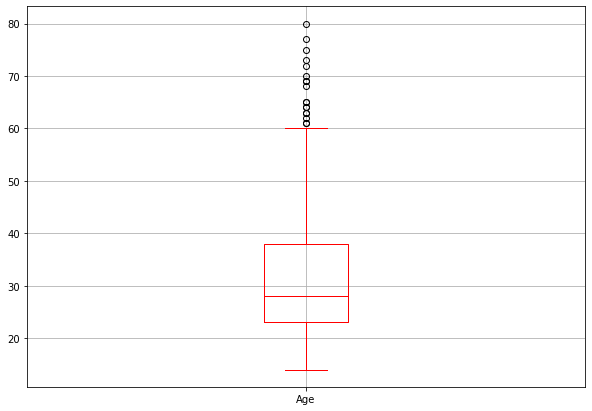

In [22]:
#Age column

fig = plt.figure(figsize =(10, 7))
df.boxplot("Age", color = "red" )
plt.show()

In [23]:
outliers_1 = (df['Age'] >= 60)  

df[outliers_1]

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
90,1,62,13.0,0,0,Energy,Black,5,1,0,0,0,ByBirth,1017.385507,0
130,1,68,6.0,1,1,Education,Other,13,1,1,1,1,ByBirth,1017.385507,1
157,0,69,15.0,1,1,Education,Other,0,1,1,14,0,ByBirth,3376.000000,1
164,0,61,16.0,1,1,Materials,White,11,1,0,0,1,ByBirth,10561.000000,1
206,0,72,0.0,1,1,Energy,White,0,0,0,0,0,Temporary,1017.385507,1
212,1,60,14.0,1,1,Healthcare,Latino,18,1,1,15,1,ByBirth,1000.000000,1
221,1,65,11.0,1,1,Education,Other,20,1,1,7,1,ByBirth,1017.385507,1
268,1,60,2.0,1,1,Materials,White,0,1,0,0,1,ByBirth,1017.385507,1
296,1,69,9.0,1,1,Healthcare,Latino,4,0,1,1,0,ByBirth,6.000000,0
345,1,63,7.0,1,1,Education,Other,0,0,0,0,0,ByBirth,12.000000,0


In [24]:
# Minimum age to have a credit card is 18 yrs. 
under_age = (df['Age'] < 18)  

df[under_age]

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
25,0,16,1.0,1,1,Energy,Black,2,1,1,2,0,ByBirth,1017.385507,1
265,1,17,0.0,0,0,Energy,White,0,0,0,0,0,ByBirth,722.000000,0
279,1,16,1.0,1,1,CommunicationServices,White,0,1,0,0,0,ByOtherMeans,1017.385507,0
283,0,16,1.0,1,1,Materials,White,0,0,1,1,0,ByBirth,98.000000,0
294,0,16,0.0,1,1,Healthcare,Latino,0,0,1,1,0,ByBirth,126.000000,0
298,1,16,3.0,1,1,ConsumerStaples,White,1,0,1,1,0,ByBirth,21.000000,0
303,0,16,3.0,1,1,Materials,White,0,0,0,0,0,ByBirth,1017.385507,0
312,0,16,0.0,1,1,ConsumerStaples,White,0,0,0,0,0,ByBirth,1.000000,0
314,1,16,0.0,0,0,ConsumerStaples,White,0,0,0,0,0,ByBirth,1017.385507,0
355,0,16,0.0,1,1,ConsumerStaples,White,1,0,1,2,1,ByBirth,1.000000,0


#### In the Age column, there were clearly some outliers which we removed. We also removed the laws with age less than 18 as it is not possible for the candidates to get a credit card approved if they are under the age of 18.  

We used a reset_index() function to reset the index of the data set after deleting the rows.

In [25]:
#Deleting the outliers rows
df.drop(df.index[df['Age'] >= 60 ], inplace = True)

#Deleting the rows with age below 18 years
df.drop(df.index[df['Age'] < 18], inplace = True)

#Resetting the index of the data frame after deleting the rows
df.reset_index(drop = True, inplace = True)

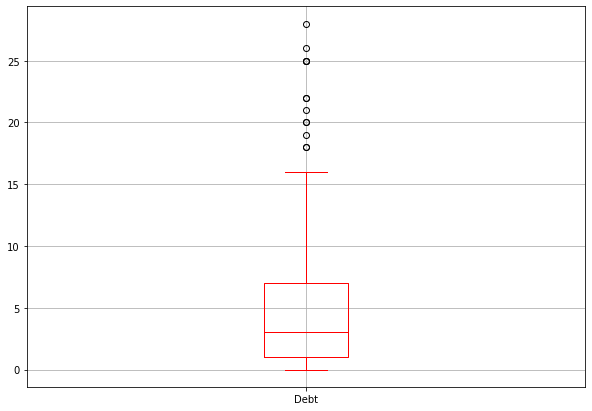

In [26]:
#Debt column

fig = plt.figure(figsize =(10, 7))
df.boxplot("Debt", color = "red" )
plt.show()

In [27]:
outliers_2 = (df['Debt'] > 17)  

df[outliers_2]

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
26,1,57,18.0,1,1,Real Estate,Asian,15,1,1,17,1,ByBirth,1017.385507,1
43,1,56,28.0,0,0,Energy,White,28,1,1,40,0,ByBirth,15.000000,1
68,1,35,25.0,1,1,Utilities,Black,2,1,1,1,1,ByBirth,500.000000,1
79,1,50,19.0,1,1,Healthcare,Latino,0,1,1,1,0,ByBirth,1017.385507,0
178,0,57,20.0,1,1,Energy,White,6,1,1,7,0,ByBirth,3000.000000,1
226,0,58,21.0,1,1,ConsumerDiscretionary,Asian,10,1,1,13,0,ByBirth,6700.000000,1
233,1,48,25.0,1,1,Industrials,White,2,1,1,3,0,ByBirth,14.000000,1
242,1,40,22.0,1,1,Education,Other,20,1,1,11,0,ByBirth,1200.000000,1
289,1,49,26.0,0,0,Healthcare,Latino,0,1,0,0,1,ByBirth,1017.385507,0
299,1,18,22.0,0,1,Healthcare,Other,0,0,0,0,1,Temporary,100000.000000,1


In [28]:
#Deleting the rows
df.drop(df.index[df['Debt'] > 17 ], inplace=True)

#Resetting the index of the data frame after deleting the rows
df.reset_index(drop = True, inplace = True)

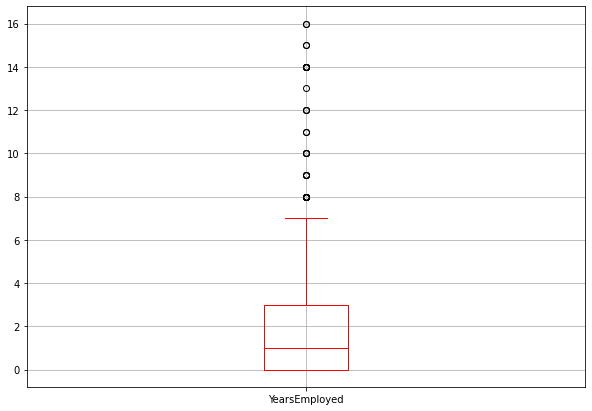

In [29]:
# Years Employed column

fig = plt.figure(figsize =(10, 7))
df.boxplot("YearsEmployed", color = "red" )
plt.show()

In [30]:
outliers_3 = (df['YearsEmployed'] > 5)  

df[outliers_3]

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
6,1,33,1.0,1,1,Transport,Black,6,1,0,0,1,ByBirth,31285.000000,1
22,0,48,8.0,1,1,Energy,White,8,1,1,6,1,ByBirth,1260.000000,1
26,1,57,8.0,1,1,Education,Black,7,1,1,3,0,ByBirth,1017.385507,1
29,1,42,10.0,1,1,Utilities,Black,8,1,1,8,0,ByBirth,1017.385507,1
30,1,50,8.0,1,1,ConsumerDiscretionary,Asian,8,1,1,15,1,ByBirth,5000.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,30,4.0,1,1,Industrials,White,8,1,1,2,1,ByBirth,1017.385507,1
512,1,42,5.0,1,1,Materials,Black,13,1,0,0,1,ByBirth,1017.385507,1
531,1,52,15.0,1,1,Energy,White,8,1,1,9,0,ByBirth,1017.385507,1
611,1,47,6.0,1,1,Industrials,White,6,0,0,0,0,ByBirth,150.000000,0


In [31]:
#Deleting the rows
df.drop(df.index[df['YearsEmployed'] > 5 ], inplace=True)

#Resetting the index of the data frame after deleting the rows
df.reset_index(drop = True, inplace = True)

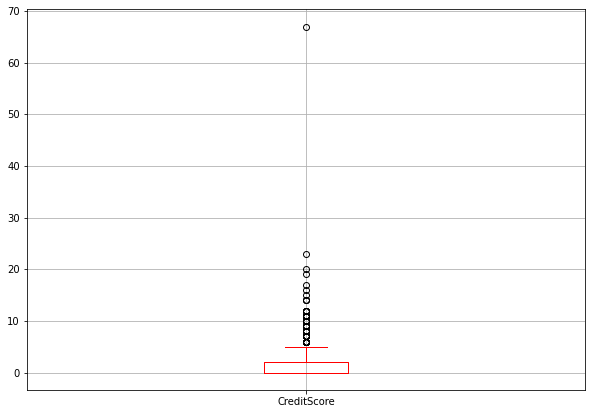

In [32]:
#CreditScore column

fig = plt.figure(figsize =(10, 7))
df.boxplot("CreditScore", color = "red" )
plt.show()

In [33]:
outliers_4 = (df['CreditScore'] > 13)  

df[outliers_4]

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
19,1,25,11.0,1,1,Energy,White,2,1,1,17,0,ByBirth,1208.0,1
36,0,41,2.0,0,0,Materials,Black,0,1,1,23,1,ByBirth,1236.0,1
82,1,55,16.0,1,1,Education,Other,0,1,1,20,0,ByBirth,130.0,0
94,1,26,12.0,1,1,InformationTechnology,White,1,1,1,67,1,ByBirth,258.0,1
107,0,56,16.0,1,1,Research,Latino,0,1,1,15,0,ByBirth,247.0,1
115,0,58,10.0,1,1,Materials,White,4,1,1,14,0,ByBirth,1602.0,1
136,1,20,8.0,1,1,ConsumerStaples,White,2,1,1,14,0,ByBirth,158.0,1
402,0,25,3.0,1,1,Materials,Black,2,1,1,19,0,ByBirth,500.0,1
438,1,39,3.0,1,1,Industrials,White,4,1,1,14,0,ByBirth,1344.0,1
441,0,32,1.0,1,1,Industrials,White,1,1,1,16,0,ByBirth,2079.0,1


In [34]:
#Deleting the rows
df.drop(df.index[df['CreditScore'] > 13 ], inplace=True)

#Resetting the index of the data frame after deleting the rows
df.reset_index(drop = True, inplace = True)

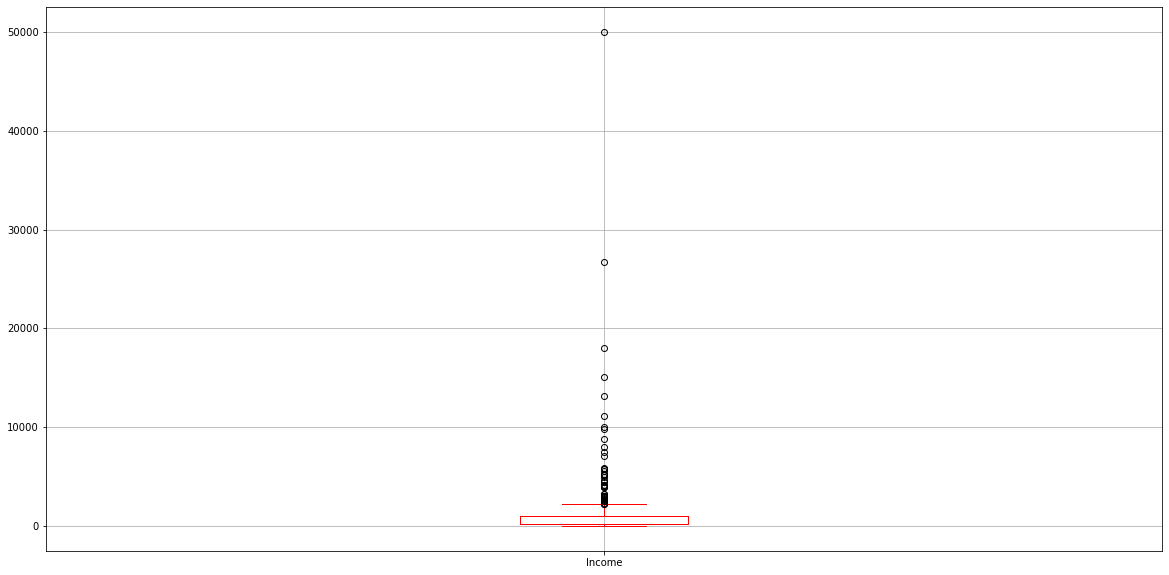

In [35]:
#Income column

fig = plt.figure(figsize =(20, 10))
df.boxplot("Income", color = "red" )
plt.show()

In [36]:
outliers_5 = (df['Income'] > 2000)  

df[outliers_5]

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
12,1,48,6.0,1,1,Financials,White,0,0,0,0,0,ByBirth,2690.0,1
23,1,42,1.0,1,1,Industrials,White,5,1,1,6,1,ByBirth,10000.0,1
25,0,37,5.0,1,1,Education,White,5,1,0,0,1,ByBirth,4000.0,1
32,1,29,15.0,1,1,Energy,Black,5,1,1,11,0,ByBirth,2283.0,1
39,1,37,2.0,1,1,Industrials,White,0,1,0,0,1,ByBirth,5800.0,1
49,1,34,2.0,1,1,InformationTechnology,White,2,1,1,1,1,ByBirth,50000.0,1
51,1,26,0.0,1,1,CommunicationServices,White,0,1,1,3,0,ByBirth,15108.0,1
52,1,19,6.0,1,1,Industrials,Black,1,1,1,7,0,ByBirth,2954.0,1
92,1,48,2.0,1,1,CommunicationServices,Asian,2,1,1,12,1,ByBirth,2510.0,1
101,0,27,14.0,1,1,Materials,Black,5,1,1,2,0,ByBirth,5000.0,1


In [37]:
#Deleting the rows
df.drop(df.index[df['Income'] > 2000 ], inplace=True)

#Resetting the index of the data frame after deleting the rows
df.reset_index(drop = True, inplace = True)

# Data Visualisation and Explorations

Our dataset is now considered to be clean, and we are ready to visualize and explore each of the features 

### One-Variable Plots

In [38]:
#Gender Column  

df.Gender.value_counts()

1    345
0    157
Name: Gender, dtype: int64

#### Fig 1: Pie-chart showing gender distribution 

The following figure shows the ratio between male and female who have applied for a credit card. As we can see, the number of male applicants is higher than female applicants. 

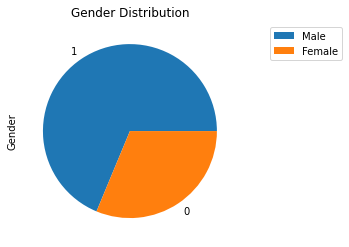

In [39]:
df["Gender"].value_counts().plot(kind="pie")
plt.title("Gender Distribution")
plt.legend(["Male","Female"],bbox_to_anchor =(1.5,1))
plt.show()

In [40]:
#Married Column

df.Married.value_counts()

1    365
0    137
Name: Married, dtype: int64

#### Fig 2: Pie-chart showing distribution of applicant’s marital status. 

From the visualization below, we could see that married applicants are more likely to apply for credit cards than single applicants. 

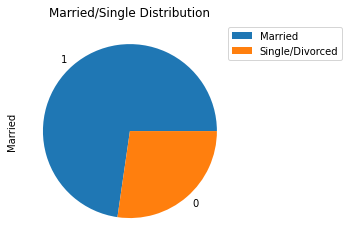

In [41]:
df["Married"].value_counts().plot(kind="pie")
plt.title("Married/Single Distribution")
plt.legend(["Married","Single/Divorced"], bbox_to_anchor =(1.5,1))
plt.show()

In [42]:
#PriorDefault column

df.PriorDefault.value_counts()

0    279
1    223
Name: PriorDefault, dtype: int64

#### Fig 3: Pie-chart showing the distribution of prior history 

From the below figure, we could say that applicants with prior history are slightly lower than the non-defaulters. 

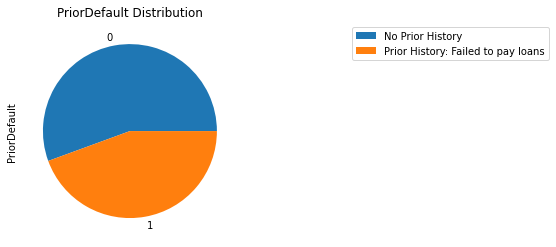

In [43]:
df["PriorDefault"].value_counts().plot(kind="pie")
plt.title("PriorDefault Distribution")
plt.legend(["No Prior History","Prior History: Failed to pay loans"], bbox_to_anchor =(1.5,1))
plt.show()

In [46]:
#Approved column

df.Approved.value_counts()

0    320
1    182
Name: Approved, dtype: int64

#### Fig 4: Pie-chart showing the distribution of credit card approvals 

By looking at the distribution below, we could say that the disapproval rate is more than the approval rate. That is, the number of applications rejected is higher than the number of applications being approved. 

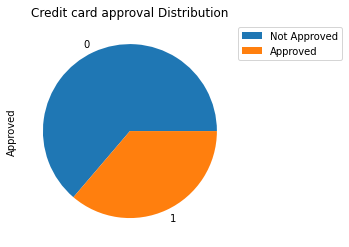

In [47]:
df["Approved"].value_counts().plot(kind="pie")
plt.title("Credit card approval Distribution")
plt.legend(["Not Approved","Approved"], bbox_to_anchor =(1.5,1))
plt.show()

In [48]:
#Industry column

df.Industry.value_counts()

Energy                   110
Materials                 52
ConsumerDiscretionary     46
Industrials               45
ConsumerStaples           44
Financials                40
Healthcare                37
CommunicationServices     29
InformationTechnology     28
Real Estate               26
Utilities                 22
Education                 12
Research                   9
Transport                  2
Name: Industry, dtype: int64

#### Fig 5: Bar plot showing the background of the applicants. 

The chart below shows that the highest number of applicants work in the energy sector, and lowest is from transportation industry.  

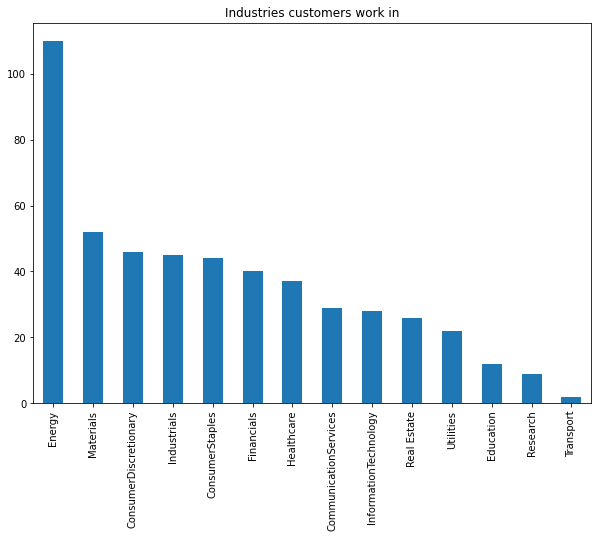

In [49]:
fig = plt.figure(figsize =(10, 7))

df["Industry"].value_counts().plot(kind="bar")
plt.title("Industries customers work in")
plt.show()

#### Fig 6: Plot showing the distribution of age group of the applicants 

The chart below shows most applicants are in the 20-30 age group, just covering the mean age of the applicants.  

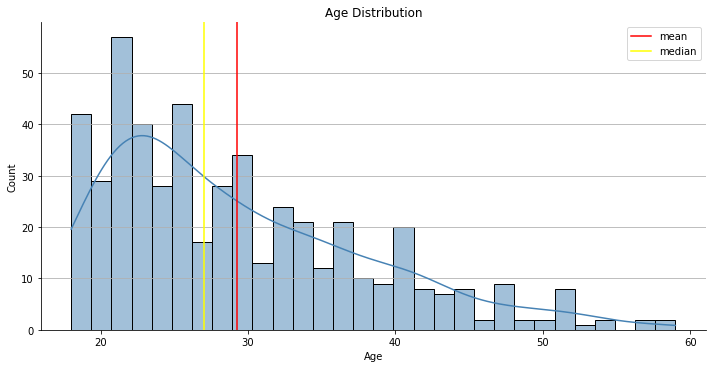

In [50]:
#Age Column 

sns.displot(df["Age"], bins = 30, kde = True, color = "steelblue", height = 5, aspect = 2)
plt.axvline(x = np.mean(df['Age']),color = 'red',label = 'mean')
plt.axvline(x = np.median(df["Age"]),color = "yellow",label = "median")
plt.legend(loc = "upper right")
plt.title("Age Distribution")
plt.grid(axis = "y")
plt.show()

#### Fig 7: Plot showing the debt of applicants 

The figure below shows a right skewed distribution. As we can see, most of the applicants have only minimal debt. 

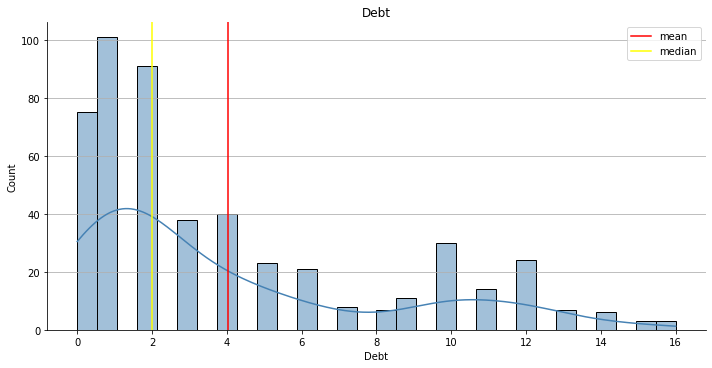

In [51]:
#Debt column

sns.displot(df["Debt"], bins = 30, kde = True, color = "steelblue", height = 5, aspect = 2)
plt.axvline(x = np.mean(df['Debt']),color = 'red',label = 'mean')
plt.axvline(x = np.median(df["Debt"]),color = "yellow",label = "median")
plt.legend(loc = "upper right")
plt.title("Debt")
plt.grid(axis = "y")
plt.show()

### Two-Variable Plots

Fig 8: Below chart shows that there are fewer number of female applicants when compared to male applicants, and the credit card approval rate is also lower for them. 

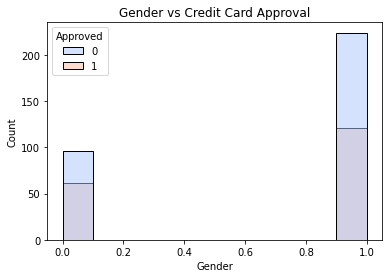

In [52]:
#Binary columns Vs Approved

#Gender vs Approved
sns.histplot(hue = 'Approved', x = 'Gender', data = df, palette = 'coolwarm') 
plt.title("Gender vs Credit Card Approval")
plt.show()

#### Fig 9: From the chart below, we could say that while the number of married applicants is more, credit card disapproval rate is about the same for married/single applicants.

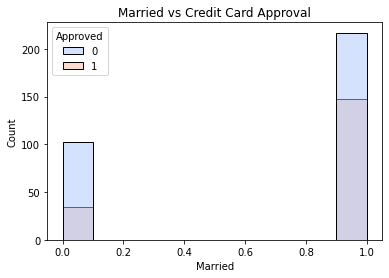

In [53]:
#Married vs Approved
sns.histplot(hue = 'Approved', x = 'Married', data = df, palette = 'coolwarm') 
plt.title("Married vs Credit Card Approval")
plt.show()

#### Continuous columns distribution vs Approved column

#### Fig 10: The chart below shows the relationship between Age feature and Approval rate. As we can see, most of the disapprovals have been given for the applicants in the age group 18-40. 

 

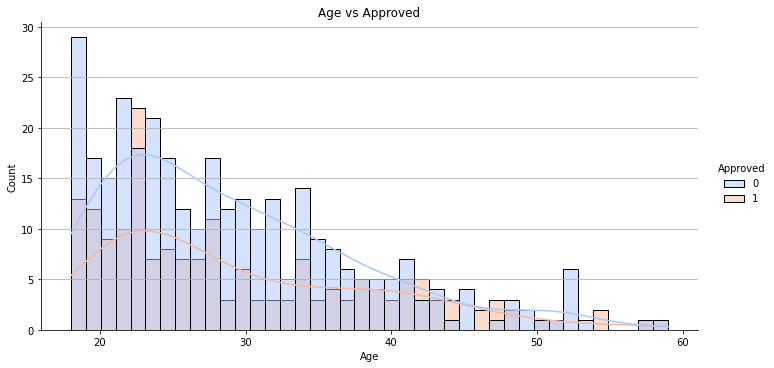

In [55]:
#Distribution of age vs Approved

sns.displot(df, x="Age", hue="Approved", kde = True, bins = 40, height = 5, aspect = 2,
            palette = "coolwarm", legend = True)
plt.title("Age vs Approved")
plt.grid(axis = "y")
plt.show()

#### Fig 11: The visual representation below clearly indicates that there is no direct relationship between the two features, Debt and Approved. Even though most of the applicants have minimal debt, the disapproval rate for these applicants is higher. 

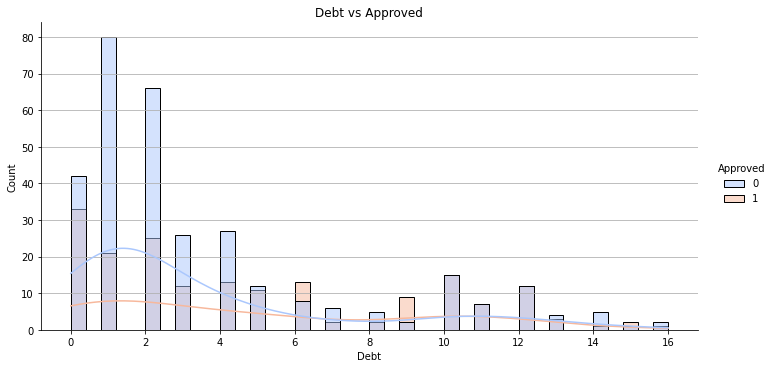

In [56]:
#Distribution of Debt vs Approved

sns.displot(df, x="Debt", hue="Approved", kde = True, bins = 40, height = 5, aspect = 2,
            palette = "coolwarm", legend = True)
plt.title("Debt vs Approved")
plt.grid(axis = "y")
plt.show()

#### Fig 12: This figure shows the importance of work experience on credit card approval. As shown, the approval rate is higher for experienced professionals. 

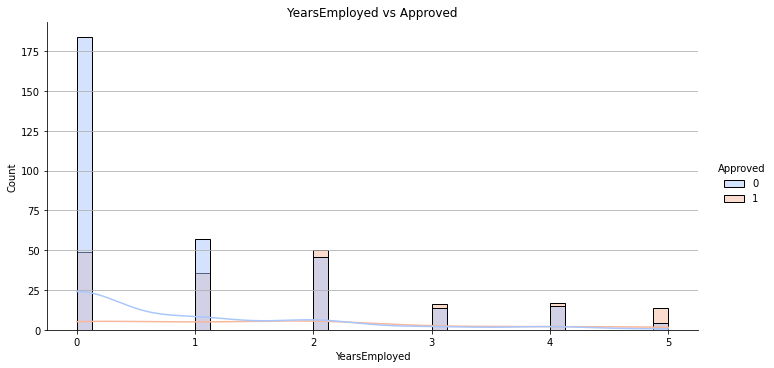

In [57]:
#Distribution of YearsEmployed vs Approved

sns.displot(df, x="YearsEmployed", hue="Approved", kde = True, bins = 40, height = 5, aspect = 2,
            palette = "coolwarm", legend = True)
plt.title("YearsEmployed vs Approved")
plt.grid(axis = "y")
plt.show()

#### Fig 13: 
The following visualization examines the relationship between the Income feature and credit card approval. Most applicants have a monthly income of 1000AUD, with only a small proportion earning up to 2000AUD. Surprisingly, the disapproval rate is highest for the income range of 1000AUD. Moreover, a small number of applicants earning less than this threshold have still obtained approval. Thus, we can conclude that while income is certainly a significant factor in determining an applicant's credibility, earning a higher income does not necessarily guarantee approval. 

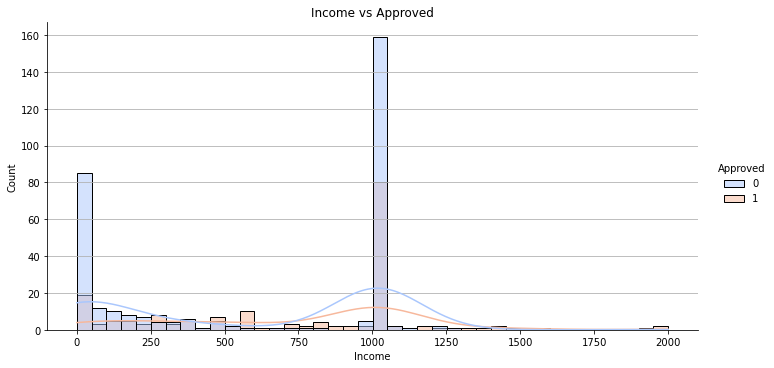

In [58]:
#Distribution of Income vs Approved

sns.displot(df, x="Income", hue="Approved", kde = True, bins = 40, height = 5, aspect = 2,
            palette = "coolwarm", legend = True)
plt.title("Income vs Approved")
plt.grid(axis = "y")
plt.show()

### Three-Variable Plots

#### Fig 14:  

The bar plot below shows how the approved credit card rate varies based on the level of debt and years of employment of credit card applicants. The y-axis represents the debt level, with higher levels at the top of the chart. The x-axis represents the years of employment, with longer employment periods located to the right of the chart. The bars on the chart are grouped by approved rate and are colored differently for each approved rate to make it easier to distinguish between them. 

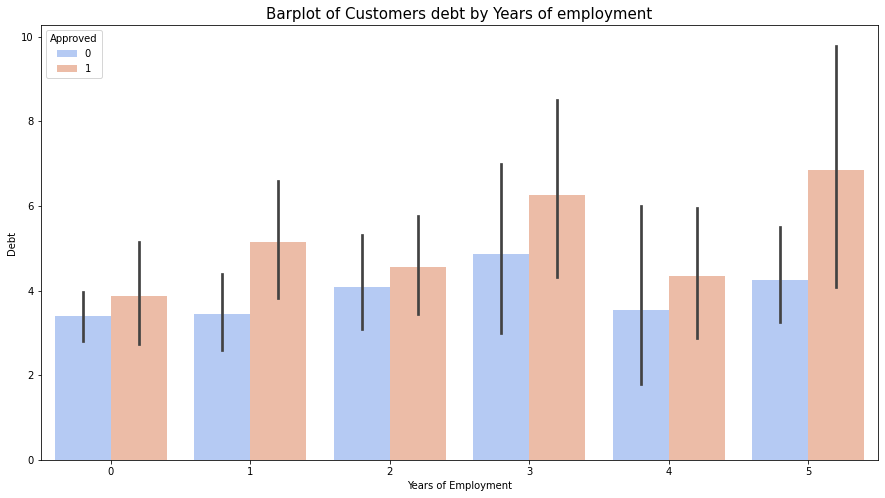

In [59]:
#Barplot of Customers debt by Years of employment

plt.figure(figsize = (15,8))
sns.barplot(y ='Debt', x ='YearsEmployed', hue = 'Approved', data = df,  palette = "coolwarm")
plt.title('Barplot of Customers debt by Years of employment', fontsize = 15)
plt.xlabel('Years of Employment', fontsize = 10)
plt.ylabel('Debt', fontsize = 10) 
plt.show()

#### Fig 15:  

The scatter plot below shows how the credit score and debt level of credit card applicants relate to their likelihood of being approved or rejected for a credit card. The x-axis represents the level of debt, with higher levels of debt located at the right of the chart. The y-axis represents the credit score, with higher credit scores located at the top of the chart. The color of the dot indicates whether the applicant was approved or rejected for a credit card. 

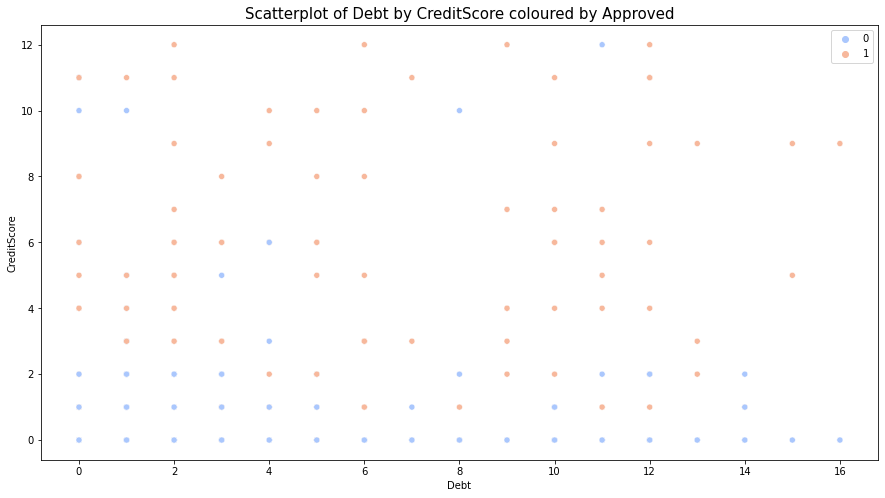

In [60]:
#Debt,Credit Score and Approved

plt.figure(figsize = (15,8))
sns.scatterplot(df['Debt'], df['CreditScore'], hue = df['Approved'],  palette = "coolwarm")
plt.title('Scatterplot of Debt by CreditScore coloured by Approved', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show()

#### Fig 16: 

The bar plot below shows how the approved credit card rate varies based on the level of Prior default (Whether previously failed to pay loan/interest) and Income of the applicant. The y-axis represents the scaled Income of the applicant. The x-axis represents the prior default feature of the applicant. The graph indicates that applicants with higher income and no prior default history have higher chances of getting their credit card approved. 

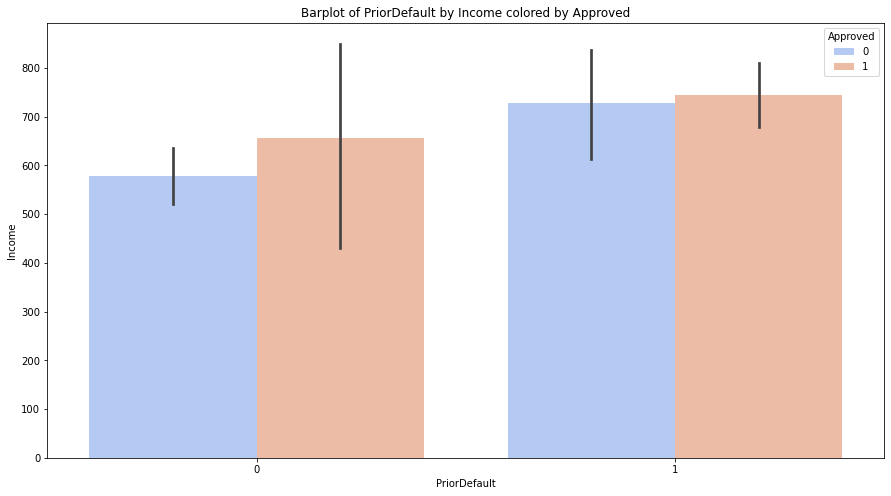

In [61]:
#PriorDefault, Income and Approved column

plt.figure(figsize = (15,8))
sns.barplot(x ='PriorDefault', y ='Income', hue = 'Approved', data = df,  palette = "coolwarm")
plt.title('Barplot of PriorDefault by Income colored by Approved')
plt.xlabel('PriorDefault', fontsize = 10)
plt.ylabel('Income', fontsize = 10) 
plt.show()

#### Fig 17:
The bar plot below shows how the approved credit card rate varies based on the level of Prior default (Whether previously failed to pay loan/interest) and Credit score of the applicant. The y-axis represents credit score. The x-axis represents the prior default feature of the applicant. The graph indicates that applicants with higher credit card scores have more chances of approval of credit card. 

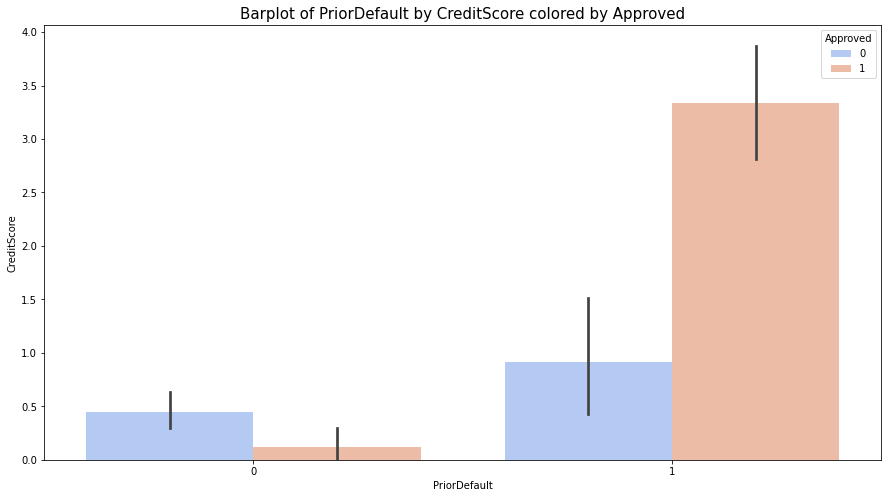

In [62]:
#PriorDefault, credit score and approved columns

plt.figure(figsize = (15,8))
sns.barplot(x ='PriorDefault', y ='CreditScore', hue = 'Approved', data = df,  palette = "coolwarm")
plt.title('Barplot of PriorDefault by CreditScore colored by Approved', fontsize = 15)
plt.xlabel('PriorDefault', fontsize = 10)
plt.ylabel('CreditScore', fontsize = 10) 
plt.show()

#### Fig 18: 

The bar chart below shows how the approval rate for credit cards varies based on the marital status and income level of credit card applicants. The x-axis represents marital status, with distinct categories located along the bottom of the chart. The y-axis represents income, with higher income levels located at the top of the chart. From the visualization we can see that the applicants who are married and have low income, have low chances of getting a credit card approval.  

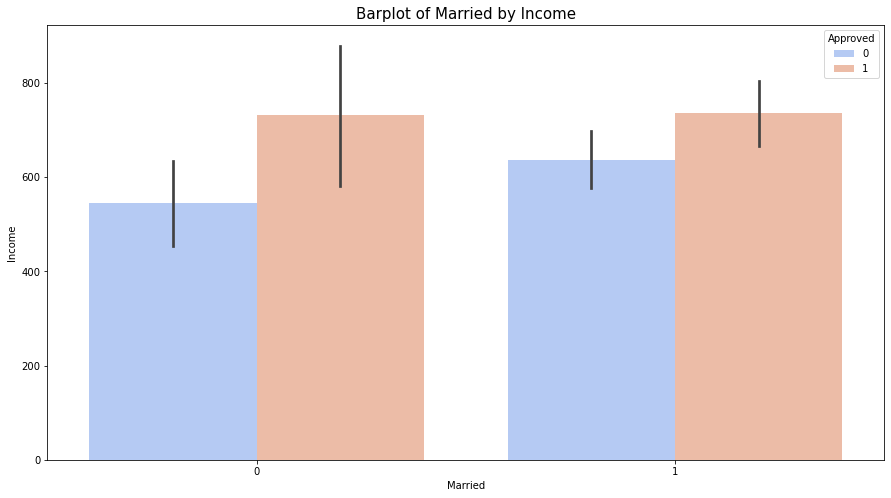

In [63]:
#Married, Income and Approval columns

plt.figure(figsize = (15,8))
sns.barplot(x ='Married', y ='Income', hue = 'Approved', data = df,  palette = "coolwarm")
plt.title('Barplot of Married by Income', fontsize = 15)
plt.xlabel('Married', fontsize = 10)
plt.ylabel('Income', fontsize = 10) 
plt.show()

#### Summary and Conclusions 

The objective of our project is to identify and analyze the potential variables and the relationships between them and the target feature to build a model that would expedite the credit card approval process. 

In phase 1 of our project, we have carried out data cleaning, exploration and visualization data cleaning stage involved removing null records, irrelevant column ‘Zip Code’, removing outliers from Age, Debt, YearsEmployed and Credit Score columns. The income variable in the dataset was scaled and hence had zeros which were not meaningful. We applied mean value for this column as it would help while comparing it with other features. Since the dataset had only 690 records originally, we have decided to go further with the record count remaining after cleaning process for second phase of the project. 

In the data visualization part, we have performed univariate, bivariate and three-variable plots to clearly explore the dependence of target variable and the influence of other features on the target variable, ‘Approved’. 

Based on the findings presented, it can be concluded that a sizable portion of credit card applications are submitted by male and married applicants. Additionally, applicants with prior experience and high credit scores have a higher chance of approval. However, conducting further analysis could uncover additional insights that may aid in determining the likelihood of an application's approval probability.  

  



#### References 

 

+ Cortinhas, S. (2022, April 25). Credit card approvals (clean data). Kaggle. Retrieved April 9, 2023, from https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data 

+ UCI Machine Learning Repository: Data Sets. (n.d.). Retrieved April 9, 2023, from https://archive.ics.uci.edu/ml/datasets.php   